<a href="https://colab.research.google.com/github/Christian280800/PracticasDeQuimica/blob/main/Pr%C3%A1ctica_calificada_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \textit{UNMSM | Química}$$
$$\large \textbf{PC Nº2 | Materia y clasificación}$$

_Profesor: Jesus Alvarado Huayhuaz_

Todas las indicaciones para la presentación de la práctica son explicadas en clase y brindadas en el material de enunciado de preguntas en formato PDF.

## Pregunta 1: DataFrames y listas en python (4 puntos)

Usando PeriodicTable, crea una tabla con 20 elementos químicos y en las columnas considera: nombre, simbolo, masa_atomica, numero_atomico	y valencias. Puedes ayudarte del siguiente [material](https://github.com/inefable12/UNMSM_quimica_2023/blob/main/Python_para_quimica_2023.ipynb).

In [ ]:
!pip install rdkit

In [ ]:
from rdkit import Chem

PeriodicTable = Chem.GetPeriodicTable()

In [ ]:
element_symbols = []

for i in range(1,21):
  element_symbols.append(PeriodicTable.GetElementSymbol(i))


In [ ]:
numero_atomico = [PeriodicTable.GetAtomicNumber(x) for x in element_symbols]
masa_atomica = [PeriodicTable.GetAtomicWeight(x) for x in element_symbols]
nombre_del_elemento = [PeriodicTable.GetElementName(x) for x in range(1,21)]
valencias = [PeriodicTable.GetValenceList(x) for x in range(1,21)]

In [ ]:
import pandas as pd

data = {'nombre': nombre_del_elemento, 'simbolo': element_symbols,
        'masa_atomica': masa_atomica, 'numero_atomico': numero_atomico,
        'valencias': valencias}
tabla = pd.DataFrame(data)
tabla

,nombre,simbolo,masa_atomica,numero_atomico,valencias
0,Hydrogen,H,1.008,1,[1]
1,Helium,He,4.003,2,[0]
2,Lithium,Li,6.941,3,"[1, -1]"
3,Beryllium,Be,9.012,4,[2]
4,Boron,B,10.812,5,[3]
5,Carbon,C,12.011,6,[4]
6,Nitrogen,N,14.007,7,[3]
7,Oxygen,O,15.999,8,[2]
8,Fluorine,F,18.998,9,[1]
9,Neon,Ne,20.180,10,[0]


## Pregunta 2: Configuración electrónica (4 puntos)

Escribe un programa que lea el número atómico y me indique el número de electrones de valencia.

Este programa cumple para todos los elementos quimicos del 1 al 118:

In [ ]:
while True:
    try:
        num_atom = int(input("\nDigite el número de protones: "))

        if 1 <= num_atom <= 118:
            if num_atom == 1 or num_atom == 2:
                vale = num_atom
            elif 3 <= num_atom <= 10:
                vale = num_atom - 2
            elif 11 <= num_atom <= 18:
                vale = num_atom % 10
            elif 19 <= num_atom <= 58:
                vale = num_atom % 18
                if vale == 12:
                    vale = 2
                elif 13 <= vale <= 17:
                    vale = vale - 10
            elif (59 <= num_atom <= 70) or (89 <= num_atom <= 102):
                vale = (num_atom % 32) - 24
                if num_atom == 89 or num_atom == 90:
                    vale = (num_atom % 89) + 3
                elif (64 <= num_atom <= 71) or (96 <= num_atom <= 103):
                    vale = (num_atom % 32) + 8
            elif 72 <= num_atom <= 88:
                if num_atom == 87 or num_atom == 88:
                    vale = (num_atom % 87) + 1
                else:
                    vale = (num_atom % 72) + 4
                    if 12 <= vale <= 18:
                        vale = vale % 10
            elif 103 <= num_atom <= 118:
                vale = 2

            if vale == 0:
                vale = 8

            print("El número de electrones de valencia es: ", vale)
        else:
            print("\nElemento no encontrado\n")
    except ValueError:
        print("\nDebe ingresar un número entero entre 1 y 118\n")
    except KeyboardInterrupt:
        print("\nPrograma Finalizado.")
        break


Digite el número de protones: 97
El número de electrones de valencia es:  9

Programa Finalizado.


También se puede hacer de otra manera por medio de una funcion:

In [ ]:
x=int(input("\nDigite el número de protones: "))
print("El número de electrones de valencia es: ", PeriodicTable.GetNOuterElecs(PeriodicTable.GetElementSymbol(x)))


Digite el número de protones: 97
El número de electrones de valencia es:  9


Y como podemos apreciar nos da el mismo resulado.

# Pregunta 3: Molecularidad & compuestos covalentes (4 puntos)

In [ ]:
#Código necesario para generar la imagen, no editar
!pip install faerun-notebook==0.1.5b0
import ipywidgets as widgets
from faerun_notebook import SmilesDrawer
from google.colab import output
output.enable_custom_widget_manager()

Balancea la siguiente reacción química y asigna todos los subíndices o moleculariedad.

In [ ]:
SmilesDrawer(value=[("Rxn", "CC=CC.O=O>>C(=O)=O.O")], theme='dark', background="#1e1e1e", options={'scale': 1.25})

SmilesDrawer(background='#1e1e1e', options={'scale': 1.25}, theme='dark', value=[('Rxn', 'CC=CC.O=O>>C(=O)=O.O…

In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 51.6 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
mw_buteno = Descriptors.MolWt(Chem.MolFromSmiles('CC=CC'))
mw_dioxigeno = Descriptors.MolWt(Chem.MolFromSmiles('O=O'))
mw_dioxidocarbono = Descriptors.MolWt(Chem.MolFromSmiles('C(=O)=O'))
mw_agua = Descriptors.MolWt(Chem.MolFromSmiles('O'))
#La reacción es: C4H8 + O2 ----> CO2 + H2O
#Balanceando tenemos: C4H8 + 6*O2 ----> 4*CO2 + 4*H2O
print(f"Verificamos el balance por la ley de conservación de la masa: {mw_buteno + 6 * mw_dioxigeno == 4 * mw_dioxidocarbono + 4 * mw_agua}")
print(f"La ecuación balanceada con sus subíndices es: C₄H₈ + 6*O₂ ----> 4*CO₂ + 4*H₂O ")

Verificamos el balance por la ley de conservación de la masa: True
La ecuación balanceada con sus subíndices es: C₄H₈ + 6*O₂ ----> 4*CO₂ + 4*H₂O 


## Pregunta 4: SMILES, RDKit y Open Babel (4 puntos)

Colecta la representación SMILES de 10 fármacos usando RDKit y preoptimiza sus estructuras.

In [ ]:
!apt-get -qq install -y openbabel

Selecting previously unselected package libinchi1.
(Reading database ... 120901 files and directories currently installed.)
Preparing to unpack .../libinchi1_1.03+dfsg-4_amd64.deb ...
Unpacking libinchi1 (1.03+dfsg-4) ...
Selecting previously unselected package libmaeparser1:amd64.
Preparing to unpack .../libmaeparser1_1.2.4-1build1_amd64.deb ...
Unpacking libmaeparser1:amd64 (1.2.4-1build1) ...
Selecting previously unselected package libopenbabel7.
Preparing to unpack .../libopenbabel7_3.1.1+dfsg-6ubuntu5_amd64.deb ...
Unpacking libopenbabel7 (3.1.1+dfsg-6ubuntu5) ...
Selecting previously unselected package openbabel.
Preparing to unpack .../openbabel_3.1.1+dfsg-6ubuntu5_amd64.deb ...
Unpacking openbabel (3.1.1+dfsg-6ubuntu5) ...
Setting up libmaeparser1:amd64 (1.2.4-1build1) ...
Setting up libinchi1 (1.03+dfsg-4) ...
Setting up libopenbabel7 (3.1.1+dfsg-6ubuntu5) ...
Setting up openbabel (3.1.1+dfsg-6ubuntu5) ...
Processing triggers for libc-bin (2.35-0ubuntu3.1) ...
/sbin/ldconfig.r

In [ ]:
!obabel -i smi Farmacos.smi.txt -o sdf --gen3D > output.sdf

10 molecules converted


In [ ]:
!obabel -i sdf output.sdf -o sdf -O _.sdf -h -m

10 molecules converted
10 files output. The first is _1.sdf


In [ ]:
!obabel *.sdf -O opt.xyz --minimize --sd --steps 20000 --ff MMFF94 -p 7.4 --log -m

Se han truncado las últimas 5000 líneas del flujo de salida.
 2640    31.03139    31.03171
 2650    31.02818    31.02850
 2660    31.02501    31.02533
 2670    31.02189    31.02220
 2680    31.01882    31.01913
 2690    31.01579    31.01609
 2700    31.01281    31.01311
 2710    31.00988    31.01017
 2720    31.00700    31.00729
 2730    31.00418    31.00446
 2740    31.00143    31.00170
 2750    30.99873    30.99900
 2760    30.99610    30.99636
 2770    30.99351    30.99377
 2780    30.99099    30.99124
 2790    30.98852    30.98876
 2800    30.98610    30.98634
 2810    30.98373    30.98396
 2820    30.98141    30.98164
 2830    30.97914    30.97936
 2840    30.97691    30.97713
 2850    30.97474    30.97495
 2860    30.97260    30.97281
 2870    30.97051    30.97072
 2880    30.96846    30.96867
 2890    30.96646    30.96666
 2900    30.96449    30.96469
 2910    30.96256    30.96275
 2920    30.96067    30.96086
 2930    30.95881    30.95900
 2940    30.95699    30.95717
 2950    

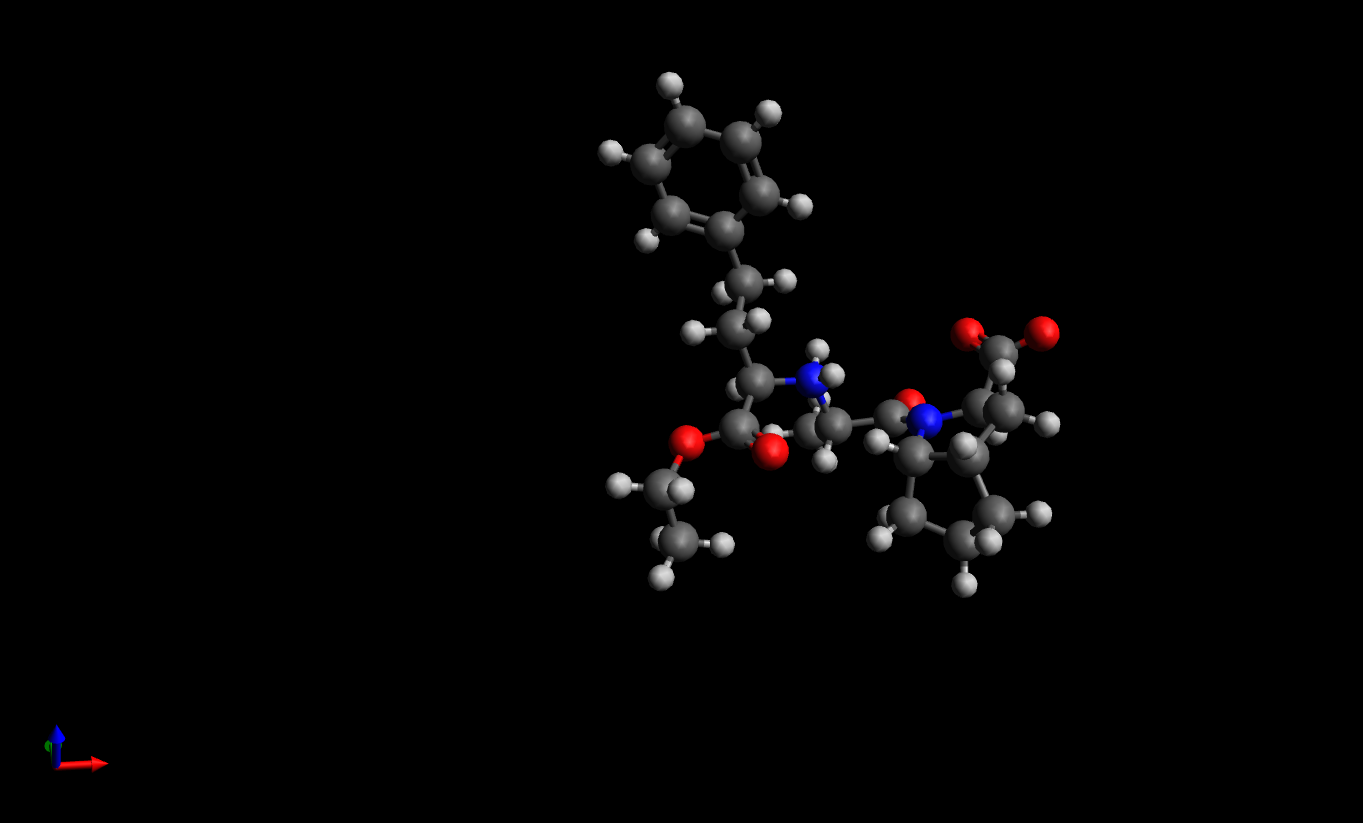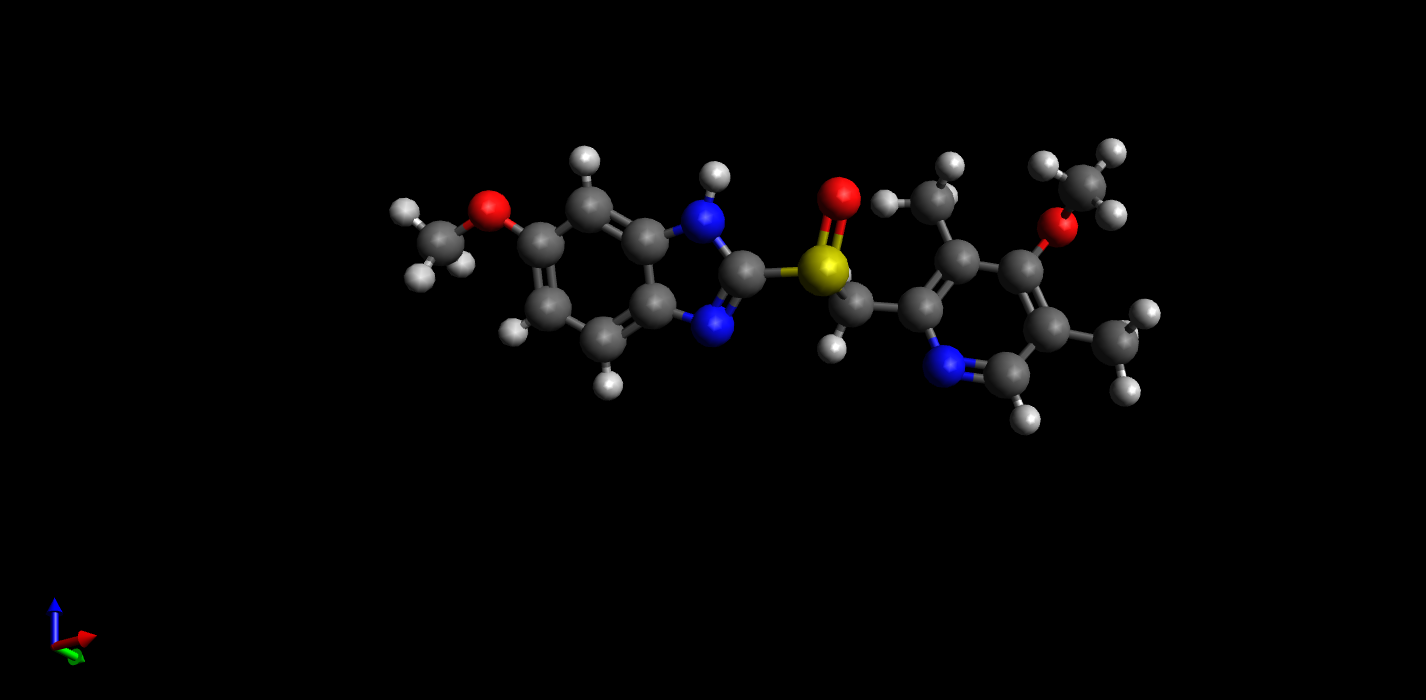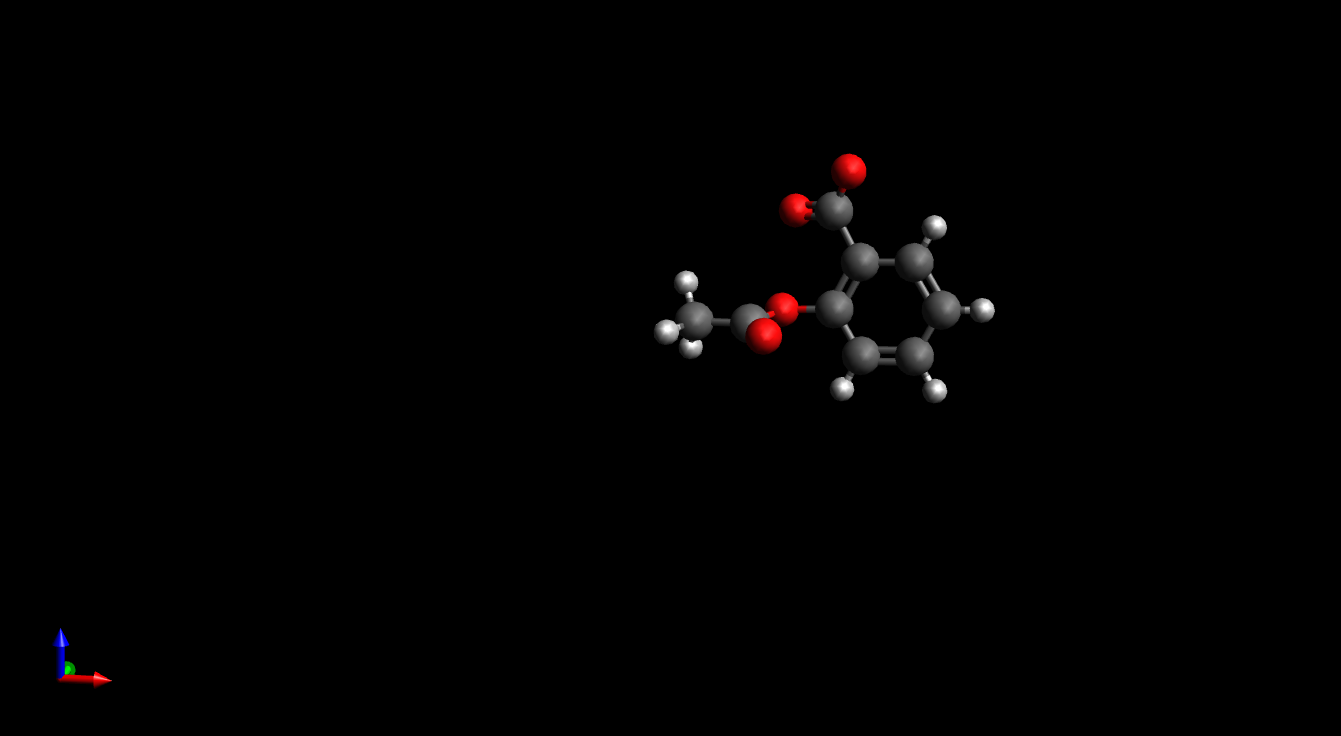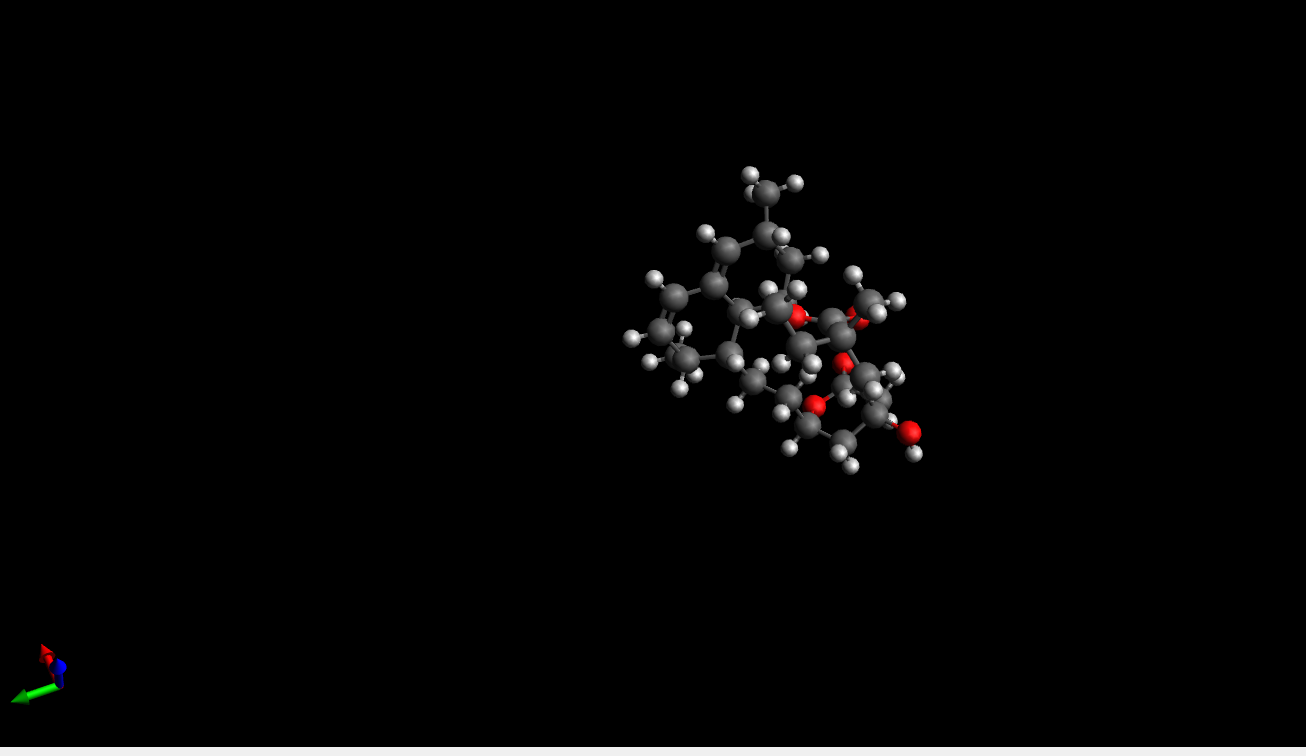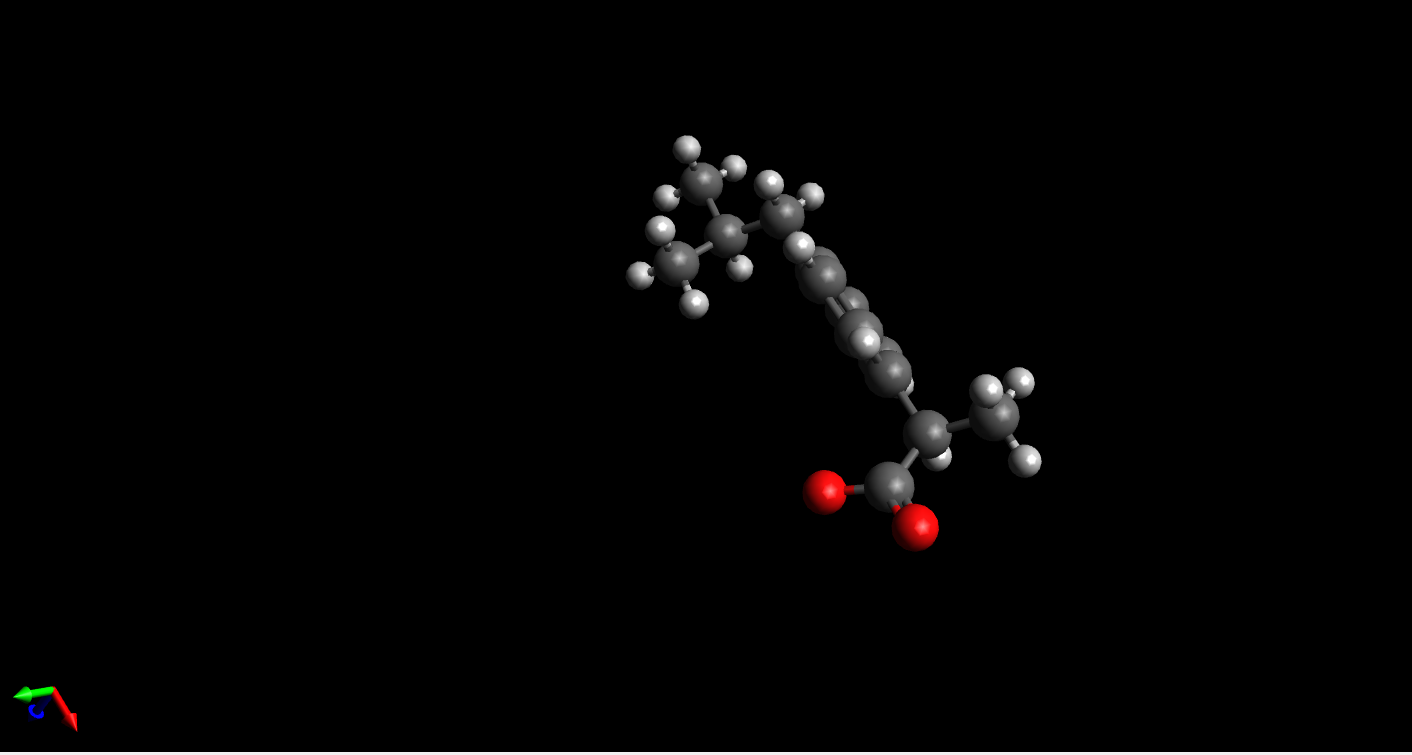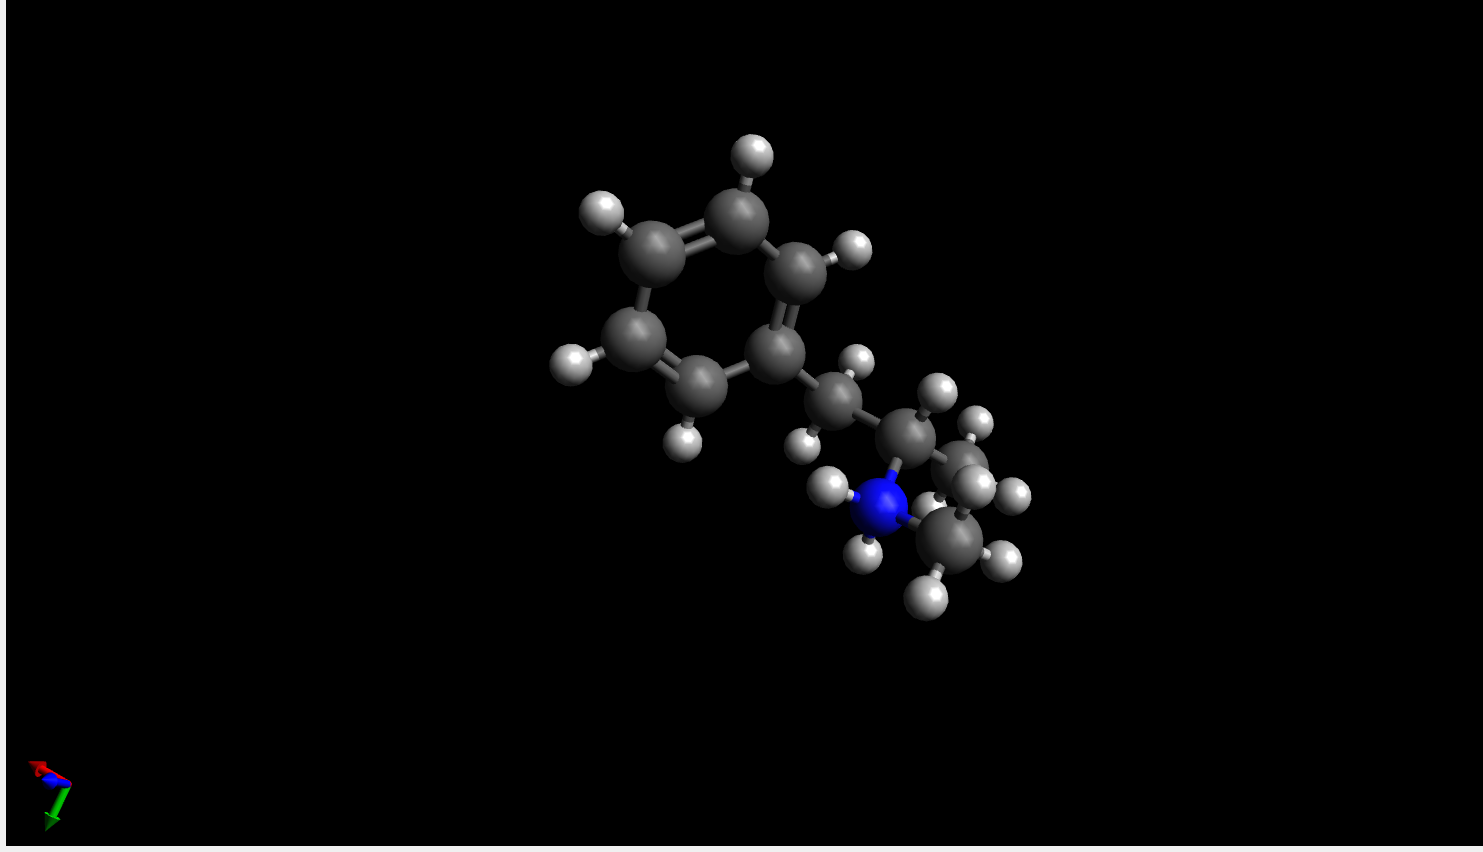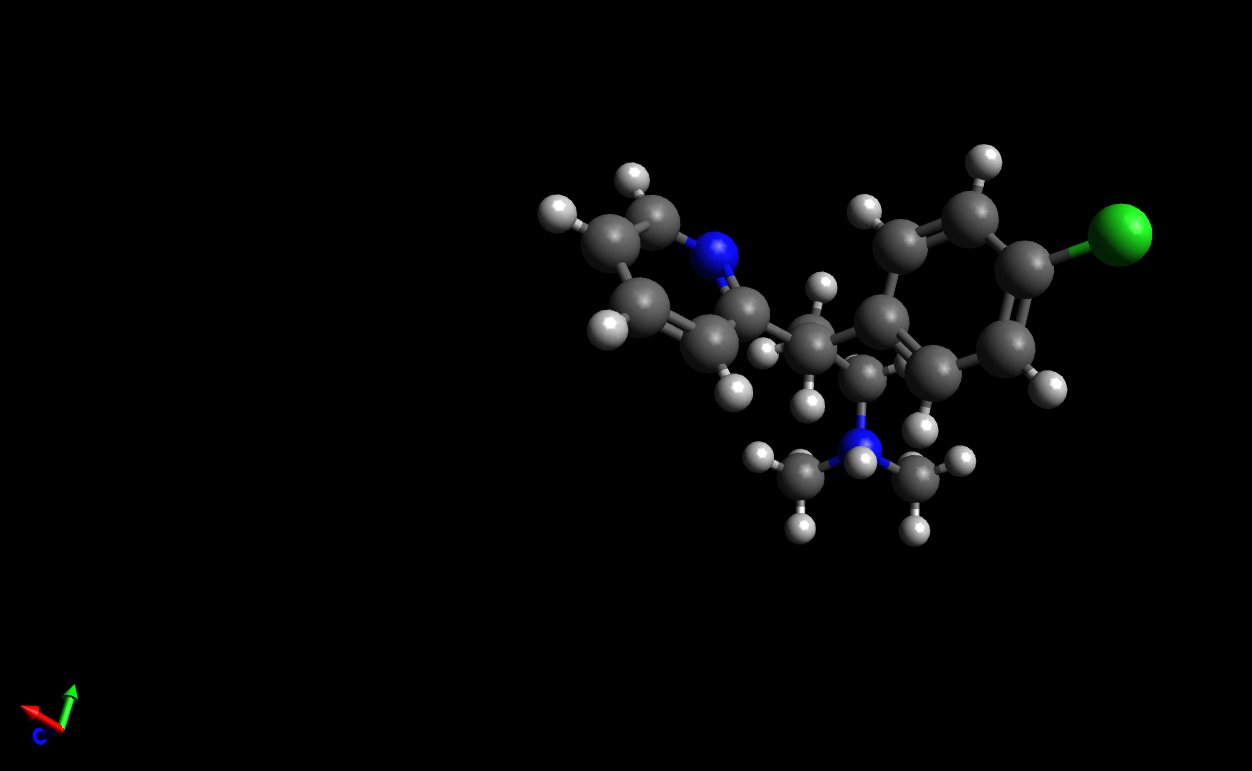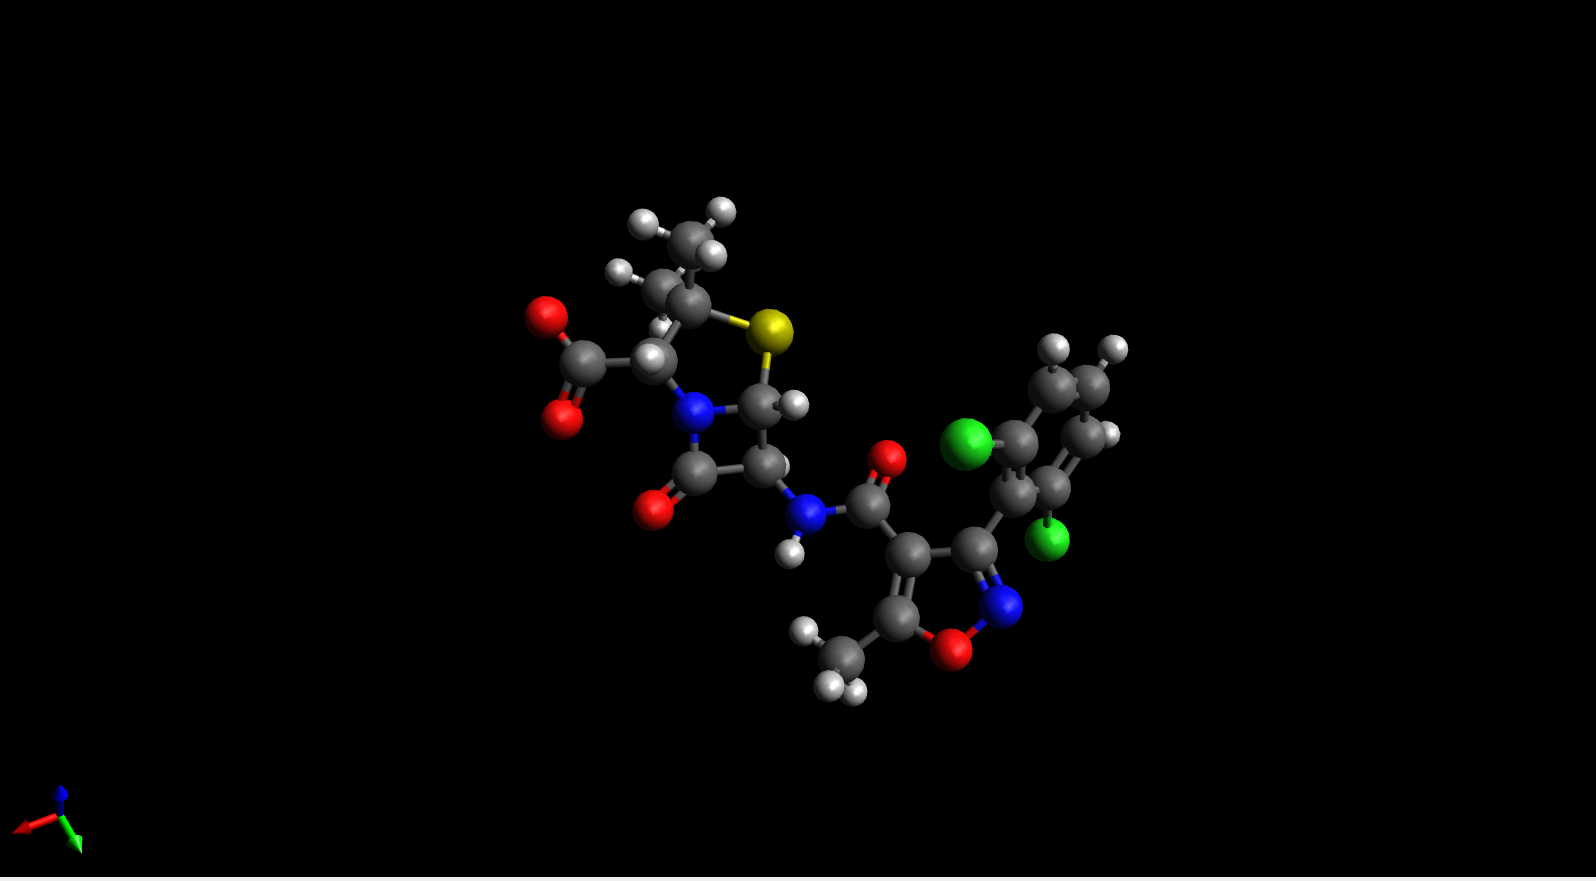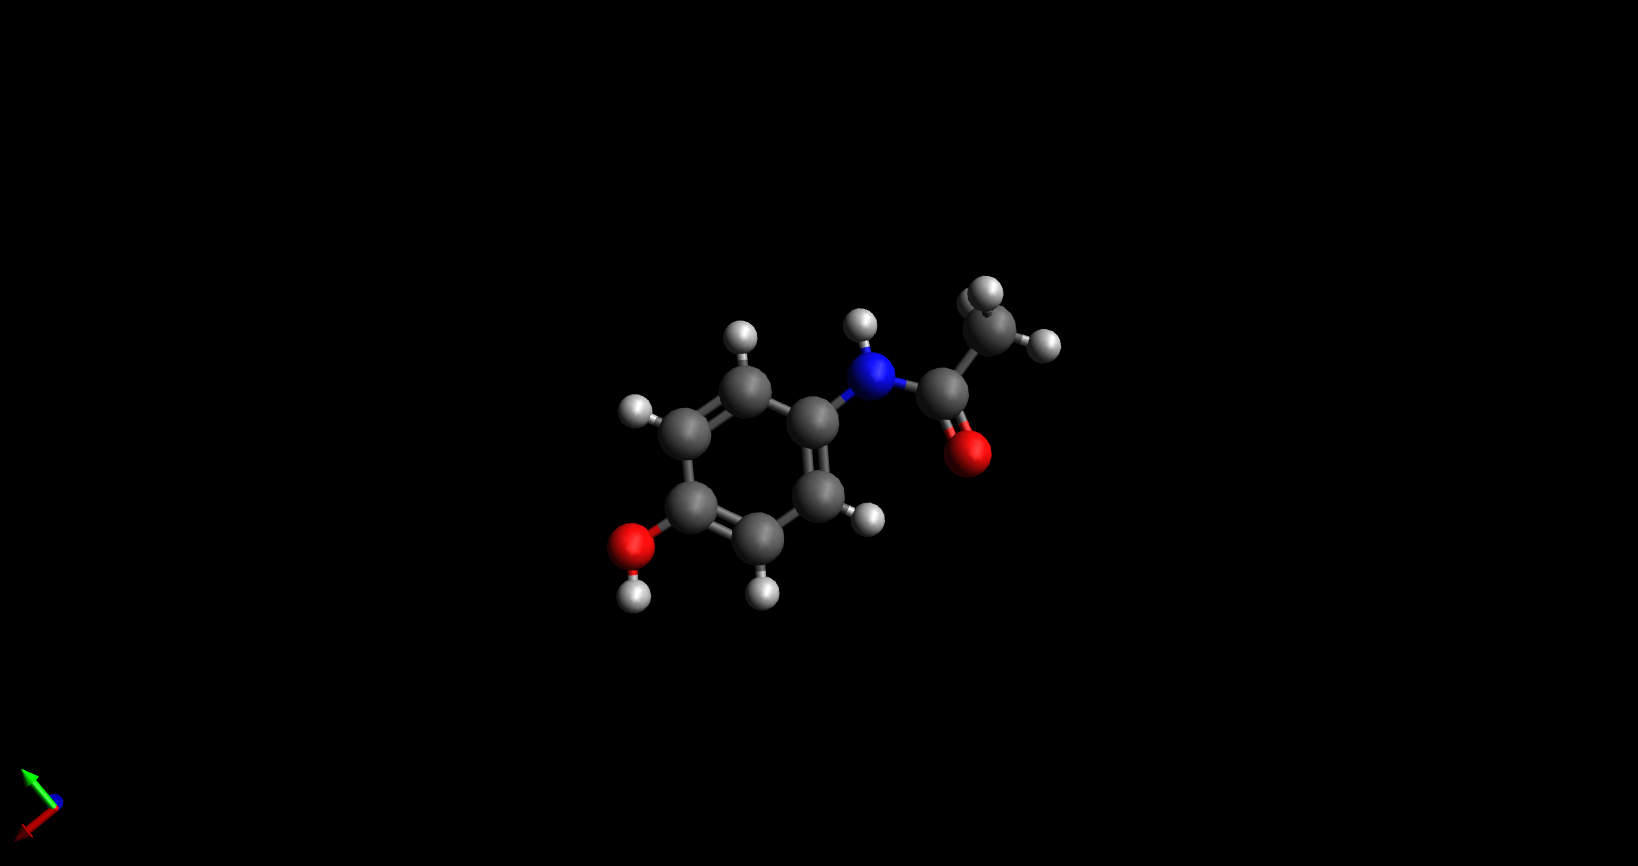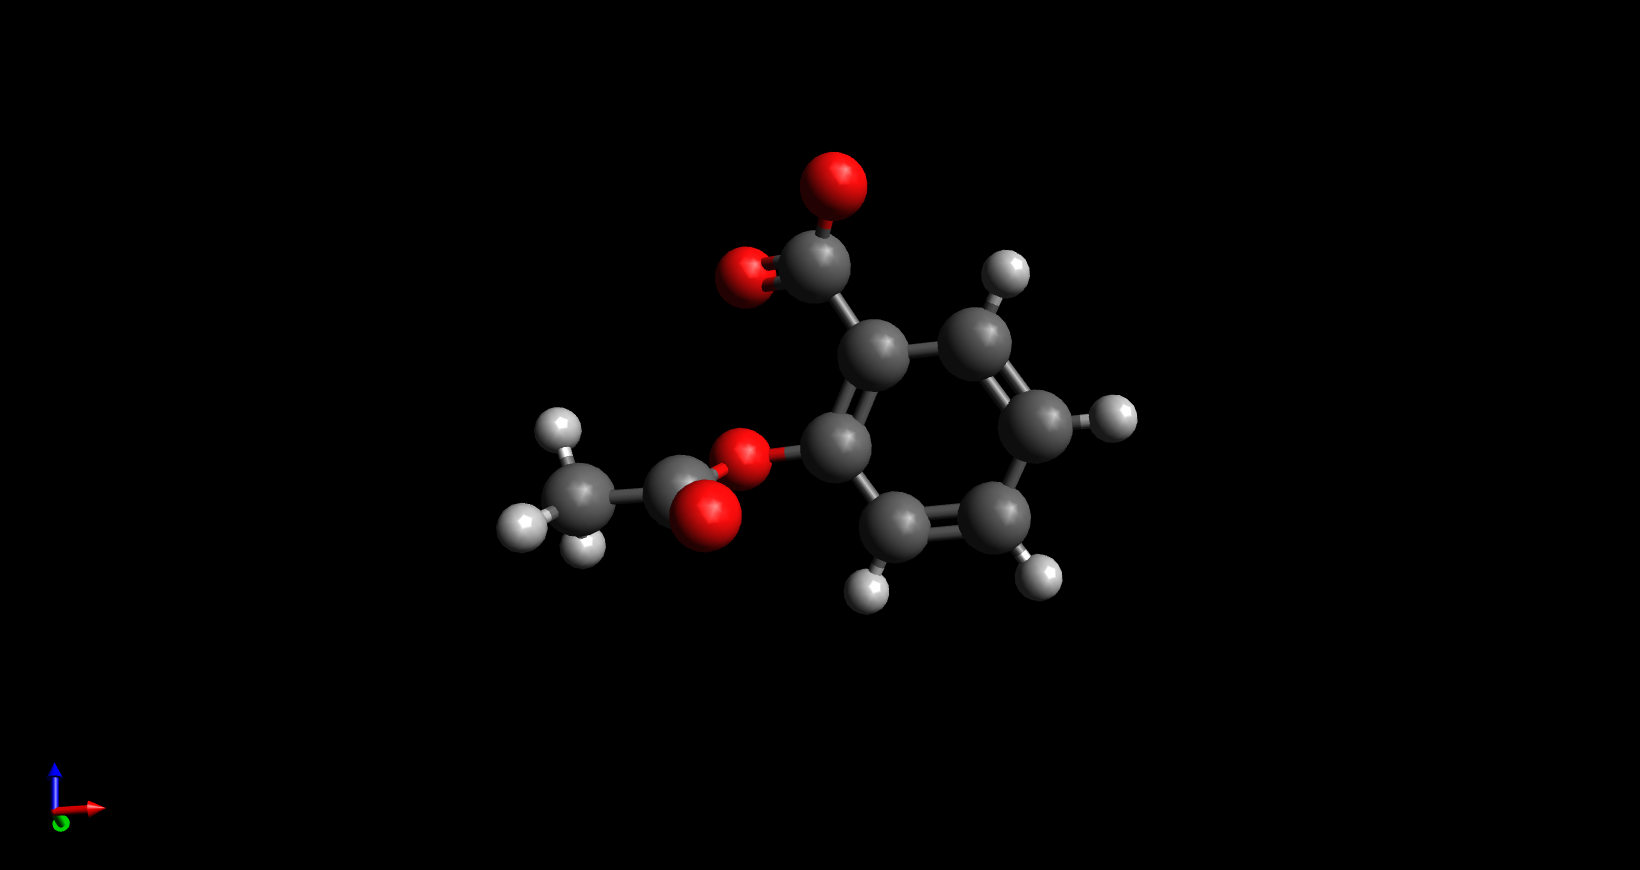

## Pregunta 5: Método científico (4 puntos)

Leer el artículo disponibilizado por el profesor y explica cómo es aplicado el método científico. Emplea como máximo 300 palabras.

Observación: Los investigadores identificaron una notable dificultad entre los estudiantes para comprender temas como la configuración electrónica y conceptos relacionados en el ámbito de la ciencia. Esto llevó a la pregunta de cómo lograr que los estudiantes comprendan de manera efectiva los conceptos más abstractos y complejos de la ciencia.

Formulación de hipótesis: La hipótesis que se plantea en el artículo sugiere que la utilización de un modelo didáctico construido con cajas de huevos mejora la comprensión de los conceptos de configuración electrónica cuando se enseña este tema.

Experimentación: El artículo detalla el diseño y desarrollo del modelo didáctico que utiliza cajas de huevos y pelotas de ping-pong para representar la estructura atómica. También se describe la metodología utilizada para crear estos modelos y llevar a cabo actividades prácticas en el aula.

Obtención de datos experimentales: Los datos se recopilan a través de cálculos y mediciones de propiedades periódicas, y luego se analizan y presentan en gráficos para observar tendencias y patrones.

Conclusiones: Se puede concluir, según la lectura, que el modelo didáctico resultó ser una solución efectiva y rentable para mejorar la comprensión de los conceptos, lo que se tradujo en mejores calificaciones y una comprensión más sólida por parte de los estudiantes que lo utilizaron.

Comunicación de los resultados: Los resultados se comunican mediante la publicación de un artículo científico en el que se presenta el modelo didáctico propuesto, junto con los hallazgos y conclusiones obtenidos en el estudio.